# NLP 2026
# Lab 2: Word Vectors and Information Retrieval
## *alt*-title: 🚀 Project CleanSearch AI, a DOGE initiative

## 🏛️🐕 PRESS RELEASE — For Immediate (and Maximum Efficiency) Distribution  

### The Department of Outdated Government Encyclopedias (DOGE) Launches Revolutionary NLP Project to Rescue Public Knowledge  

**Washington, D.C.** — In a bold step toward modernizing the nation’s most chaotic digital archives, the   **Department of Outdated Government Encyclopedias (DOGE)** today announced the launch of its new initiative:  🚀 **Project CleanSearch AI**.

For decades, citizens have struggled to find simple answers hidden inside massive, noisy, and poorly structured government knowledge repositories.

Questions such as:

- “Who won the Nobel Prize in 1930?”  
- “When did Angola become independent?”  

have resulted in thousands of irrelevant web pages, confusing biographies and excessive scrolling 📉

> *“Frankly, our archives are a mess,”* said a DOGE spokesperson.  
> *“They’re long, noisy and about as searchable as a pile of printed Wikipedia pages thrown into a hurricane.”*

### 🧠 The Solution  

DOGE has assembled an elite team of AI specialists, hired from UM DACS 2nd year bachelor program with the following goals:

✅ Clean decades of messy digital text  
✅ Extract meaningful knowledge  
✅ Replace outdated keyword search with modern **retrieval systems**  
✅ Deliver instant, accurate answers to citizens  

Using real-world noisy data similar to the government’s archives, the team will experiment with multiple retrieval models to determine the most efficient approach, methods which have been taught in the fabulous classes of some person quoted as J.S. 

Whispers across the digital corridors suggest that DOGE may soon supercede the legendary Project 2-2, though DACS management insist these rumours are “under control.”


## Deliverable:

- You are asked to deliver **two files only**:
  - your executed notebook file (`.ipynb`), and
  - your poster (`.pdf`).  
  No other files will be taken into consideration.
  
⚠️ ⚠️ ⚠️ Each part of the poster will contribute to your grade proportionally to what we present below. If we can't find the relevant part in your notebook (e.g. the figure or the code to support your findings) we will reduce (or even zero-out) your grade for that part.

### Instructions for the poster: 

The final deliverable for this lab is a **scientific poster** presenting your work on building and evaluating a sentence retrieval system using the TriviaQA dataset.
- 📏 **Size:** A0 or A1  
- 🧭 **Orientation:** Portrait or landscape (your choice)  
- 📑 **Layout:** Clear section structure (e.g., columns or blocks)  

#### Your poster should include the following sections:
---
#### 1️⃣ Problem & Motivation 🎯
- Describe the retrieval task (query → correct answer document) and the challenges
- Briefly introduce the dataset and its challenges  
#### 2️⃣ Data Preparation 🧹
Explain:
- Train / validation / test splitting  
- Your cleaning pipeline (at least 6 preprocessing steps)  
Include at least one **before vs after cleaning** example.
#### 3️⃣ Retrieval Models 🤖
Present and explain the modes you used:
- Bag-of-Words + cosine similarity  
- TF-IDF + cosine similarity  
- Sentence embeddings (averaged word embeddings)  
- [any other model?] 
Discuss strengths and limitations of each.
#### 4️⃣ Qualitative Analysis 🔍
Provide:
- At least **3 successful retrieval examples**  
- At least **3 failure cases**  
Explain why each worked or failed.
#### 5️⃣ Quantitative Evaluation 📊 (Main focus)
Report **Recall@K** (and possibly other metrics) on the **test set** for all methods:
- BOW  
- TF-IDF  
- Pre-trained embeddings  
- [Additional models]  
Include relevant table(s) and/or plot(s) and briefly discuss trends.
#### 6️⃣ Discussion & Recommendations 💡
Conclude with:
- Which method you would recommend and why  
- Key tradeoffs  
- Possible improvements  
### 🎨 Optional Creative Element (Bonus)

You may (optionally) present your poster within the fictional storyline of 🏛️ **DOGE — Department of Outdated Government Encyclopedias**, where your retrieval system modernizes chaotic national archives and replaces legacy keyword search. Creativity is welcome, but scientific clarity is the priority. We will vote for the "most creative poster".

---

### 📏 Evaluation Focus

Posters will be assessed on:
- Correctness of the pipeline incl. the code (25%)
- Clarity of explanations and interpretations of results (25%)
- Quality of analysis (20%)
- Proper use of evaluation metrics (e.g. Recall@K) (10%)
- Visual organization (10%)
- Discussion and recommendations (10%)

## Preparing the dataset

As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). We will work with TriviaQA dataset ([https://huggingface.co/datasets/sentence-transformers/trivia-qa](https://huggingface.co/datasets/sentence-transformers/trivia-qa)), which contains pairs of queries and articles that contain the answer.

In this section we will prepare the dataset, aka clean the sentences and tokenize. We will additionally extract the answers, as some articles correspond to multiple queries. We will create a separate dataset from the unique answers. We will do that for each split separately, so that we can test our retrieval fairly.

Let's start with importing the necessary libraries.

In [47]:
import re
from collections import Counter

import datasets
import numpy as np
import tqdm
from datasets import DatasetDict
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/jesse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jesse/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Loading
Now, we can begin loading the dataset and inspecting the fields.

In [48]:
dataset = datasets.load_dataset('sentence-transformers/trivia-qa')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['query', 'answer'],
        num_rows: 73346
    })
})


In [49]:
for i in range(5):
    print(dataset['train'][i])

{'query': 'Which American-born Sinclair won the Nobel Prize for Literature in 1930?', 'answer': 'The Nobel Prize in Literature 1930 The Nobel Prize in Literature 1930 Sinclair Lewis The Nobel Prize in Literature 1930 Sinclair Lewis Prize share: 1/1 The Nobel Prize in Literature 1930 was awarded to Sinclair Lewis "for his vigorous and graphic art of description and his ability to create, with wit and humour, new types of characters". Photos: Copyright © The Nobel Foundation Share this: To cite this page MLA style: "The Nobel Prize in Literature 1930". Nobelprize.org. Nobel Media AB 2014. Web. 18 Jan 2017. <http://www.nobelprize.org/nobel_prizes/literature/laureates/1930/>'}
{'query': 'Where in England was Dame Judi Dench born?', 'answer': 'Judi Dench - IMDb IMDb Actress | Music Department | Soundtrack Judi Dench was born in York, England, to Eleanora Olive (Jones), who was from Dublin, Ireland, and Reginald Arthur Dench, a doctor from Dorset, England. She attended Mount School in York, 

### Splitting

You might have noticed that the dataset is not split into subsets (it contains only the `train` subset). To maintain the good practice of working with ML, we should have three datasets: `train`, `validation`, and `test`. The code below splits our dataset into those three subsets. We set the size of both the `validation` and `test` sets as 10,000 and keep the rest in the `train` subset.

In [50]:
dataset = dataset['train'].train_test_split(test_size=10_000)
valid_dataset = dataset['test']
dataset = dataset['train'].train_test_split(test_size=10_000)
dataset['validation'] = valid_dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['query', 'answer'],
        num_rows: 53346
    })
    test: Dataset({
        features: ['query', 'answer'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['query', 'answer'],
        num_rows: 10000
    })
})


### Cleaning

Let's write the function to clean the text. It can be similar to the one from the previous lab (Lab1) but make sure that it makes sense for this dataset and task.

More specifically, think about lower-casing, punctuation, stop-words and lemmatization/stemming and the impact it might have on the dataset. Also reflect on the fact that with word embeddings we want to uncover semantic relationships between words, whereas with bag-of-words we were trying to capture different morphological variations.

<a name='e1'></a>
#### Exercise 1: Clean function
Fill in the following function to clean the dataset. Implement at least 6 different steps.

In [51]:
def clean(text):
    """
    Cleans the text
    Args:
        text: a string that will be cleaned

    Returns: the cleaned text

    """

    # Empty text
    if text == '':
        return text

    ### YOUR CODE HERE
    text = re.sub(r'(?<=\d),(?=\d)', '', text) # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub(r'([.,!?;:"])', r' \1 ', text) # space out the punctuation (i.e. "hello, world." -> "hello , world .")

    text = text.lower() # Extra step: making everything lowercase
    text = re.sub(r'http\S+', '', text) # Extra step: removes urls starting with https
    text = re.sub(r'#', '', text) # Extra step: removes hashtags

    # eliminate stop words
    text = re.sub(r'\b(a|an|the|and|or|but)\b', '', text)

    # substitute - with white spaces
    text = re.sub(r'-', ' ', text)

    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\s+', ' ', text) # remove multiple spaces at the end of the cleaning process, as some of the previous steps can introduce double spacing

    ### YOUR CODE ENDS HERE

    return text


sentence = 'Which American-born Sinclair won the Nobel Prize for Literature in 1930?'
print('Testing the clean function:')
print('Original:', sentence)
print('Cleaned:', clean(sentence))

Testing the clean function:
Original: Which American-born Sinclair won the Nobel Prize for Literature in 1930?
Cleaned: which american born sinclair won nobel prize for literature in 1930 


The following function will apply the function you just wrote to the whole dataset. More specifically, it takes the `query` and `answer` fields, applies the `clean` function and saves the processed sentences back to the `query` and `answer` fields. This will override the original fields. If you want to have access to them, you can make a copy in separate fields before cleaning. As in the last lab, we will use the `map()` method of the dataset.

In [52]:
def clean_example(example):
    """
    Applies the clean() function to the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example with cleaned 'query' and 'answer' columns

    """
    example['original_query'] = example['query']
    example['original_answer'] = example['answer']

    example['query'] = clean(example['query'])
    example['answer'] = clean(example['answer'])
    return example


dataset = dataset.map(clean_example, desc="Cleaning queries and answers")
print(dataset)

Cleaning queries and answers: 100%|██████████| 10000/10000 [00:08<00:00, 1241.17 examples/s]

DatasetDict({
    train: Dataset({
        features: ['query', 'answer', 'original_query', 'original_answer'],
        num_rows: 53346
    })
    test: Dataset({
        features: ['query', 'answer', 'original_query', 'original_answer'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['query', 'answer', 'original_query', 'original_answer'],
        num_rows: 10000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted. At this step, it might be necessary to revisit some pre-processing steps if you are not happy with the results.

In [53]:
for i in range(5):
    print('example', i)
    print('query', dataset['train'][i]['query'])
    print('answer', dataset['train'][i]['answer'])
    print()

example 0
query in november 2002 which member of british royal family was convicted fined for violating dangerous dogs act 
answer h2g2 hrh princess anne princess royal edited entry 1 conversation princess anne no nonsense princess is considered by many to be hardest working member of british royal family carrying out hundreds of official engagements every year after queen british public is said to consider anne to be royal familys most valuable national asset they feel that she gets job done fulfilling her duty without using gimmicks drawing undue attention to herself shes no clothes horse has kept same hairstyle for 30 years second in line hrh princess anne elizabeth alice louise of edinburgh second child only daughter of their royal highnesses princess elizabeth duchess of edinburgh prince philip duke of edinburgh was born at clarence house london on 15 august 1950 at time of her birth her mother was heir presumptive to throne of united kingdom anne was less than two years old when 

### Extracting answers

Because the answers in our dataset are not unique, we will extract them and create a separate dataset containing only the unique answers. We will do this for each split separately.

In [54]:
def get_answers(subset):
    """
    Extracts unique answers from the subset of the dataset and builds a dictionary with answers as keys and ids as values.
    Args:
        subset: a subset of the dataset

    Returns: a dictionary mapping answers to their ids
    """
    answer_to_id = {}
    answers = list(set(subset['answer']))
    for i, answer in enumerate(answers):
        answer_to_id[answer] = i
    return answer_to_id

We apply this function separately to each subset and create the answers dataset.

In [55]:
train_answer_to_id = get_answers(dataset['train'])
valid_answer_to_id = get_answers(dataset['validation'])
test_answer_to_id = get_answers(dataset['test'])

answers_dataset = DatasetDict({
    'train': datasets.Dataset.from_dict({'id': range(len(train_answer_to_id)), 'answer': train_answer_to_id.keys()}),
    'validation': datasets.Dataset.from_dict(
        {'id': range(len(valid_answer_to_id)), 'answer': valid_answer_to_id.keys()}),
    'test': datasets.Dataset.from_dict({'id': range(len(test_answer_to_id)), 'answer': test_answer_to_id.keys()})
})
print(answers_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'answer'],
        num_rows: 47849
    })
    validation: Dataset({
        features: ['id', 'answer'],
        num_rows: 9765
    })
    test: Dataset({
        features: ['id', 'answer'],
        num_rows: 9732
    })
})


The last thing we will have to do is to connect the answers in the original dataset to the ids of answers (in the answers dataset).

<a name='e2'></a>
#### Exercise 2: Setting answer ids
Fill in the following function to find and set the `answer_id` field with the id of the answer. The function accepts one of the `answer_to_id` dictionaries that you just created.

In [56]:
def set_answer_id(example, answer_to_id):
    """
    Sets the answer_id field in the example based on the answer_to_id dictionary
    Args:
        example: an example from the Dataset
        answer_to_id: a dictionary mapping answers to their ids

    Returns: the updated example with the 'answer_id' field
    """
    answer = example['answer']
    ### YOUR CODE HERE

    example['answer_id'] = answer_to_id[answer]


    ### YOUR CODE ENDS HERE
    return example

Here, we apply the function to each split separately making sure to pass the correct `answer_to_id` dictionary. We also remove the `answer` columns from the original dataset, as now we can reference the correct answer through the `answer_id` field.

In [57]:
dataset['train'] = dataset['train'].map(set_answer_id,
                                        fn_kwargs={'answer_to_id': train_answer_to_id},
                                        desc="Setting ids for answers (train)")
dataset['validation'] = dataset['validation'].map(set_answer_id,
                                                  fn_kwargs={'answer_to_id': valid_answer_to_id},
                                                  desc="Setting ids for answers (validation)")
dataset['test'] = dataset['test'].map(set_answer_id,
                                      fn_kwargs={'answer_to_id': test_answer_to_id},
                                      desc="Setting ids for answers (test")

dataset = dataset.remove_columns('answer')

Setting ids for answers (test: 100%|██████████| 10000/10000 [00:01<00:00, 7443.69 examples/s]


### Tokenizing

<a name='e3'></a>
#### Exercise 3: Tokenizing
As always, we will need to tokenize the dataset in order to create bat-of-words and TF-IDF representations in the next sections. You can use the function from the previous lab or use a library such as [Natural Language Toolkit (NLTK) library]([https://www.nltk.org/]) (https://www.nltk.org/). Complete the following function to split the text into tokens.

Contrary to the previous lab, we will not include the special tokens (unknown, beginning, and end of the sequence).

In [58]:
def tokenize(text):
    """
    Tokenizes the text that is assumed to be cleaned first with the clean() function. The tokenized sequence should start with the `bos_token` token and end with the 'eos_token'.
    Args:
        text: a cleaned text

    Returns: tokenized text as a list of tokens

    """

    tokens = None  # list of tokens, your code should fill this variable

    ### YOUR CODE HERE
    # we use nltk library to tokenize the text
    # tolenizer model downloaded under imports
    tokens = word_tokenize(text)


    ### YOUR CODE ENDS HERE

    return tokens

We apply your function to both the `query` field in the original dataset and `answer` field in the answers dataset. We save the tokenized queries in `query_tokens` field and answers in `answer_tokens` field.

In [59]:
def tokenize_example(example, src_column, tgt_column):
    """
    Applies the tokenize() function to the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example containing 'query_tokens' column

    """
    query = example[src_column]
    example[tgt_column] = tokenize(query)
    return example


dataset = dataset.map(tokenize_example,
                      fn_kwargs={'src_column': 'query', 'tgt_column': 'query_tokens'},
                      desc="Tokenizing queries")
print('dataset')
print(dataset)

answers_dataset = answers_dataset.map(tokenize_example,
                                      fn_kwargs={'src_column': 'answer', 'tgt_column': 'answer_tokens'},
                                      desc="Tokenizing answers")
print('answers_dataset')
print(answers_dataset)

Tokenizing queries: 100%|██████████| 10000/10000 [00:01<00:00, 7245.96 examples/s]


dataset
DatasetDict({
    train: Dataset({
        features: ['query', 'original_query', 'original_answer', 'answer_id', 'query_tokens'],
        num_rows: 53346
    })
    test: Dataset({
        features: ['query', 'original_query', 'original_answer', 'answer_id', 'query_tokens'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['query', 'original_query', 'original_answer', 'answer_id', 'query_tokens'],
        num_rows: 10000
    })
})


Tokenizing answers: 100%|██████████| 9732/9732 [00:09<00:00, 987.89 examples/s] 

answers_dataset
DatasetDict({
    train: Dataset({
        features: ['id', 'answer', 'answer_tokens'],
        num_rows: 47849
    })
    validation: Dataset({
        features: ['id', 'answer', 'answer_tokens'],
        num_rows: 9765
    })
    test: Dataset({
        features: ['id', 'answer', 'answer_tokens'],
        num_rows: 9732
    })
})


Let's examine some examples of tokenized queries and answers.

In [60]:
for i in range(5):
    print('example:', i)
    print('query:', dataset['train'][i]['query'])
    print('query_tokens:', dataset['train'][i]['query_tokens'])
    answer_id = dataset['train'][i]['answer_id']
    print('answer_id:', answer_id)
    print('answer:', answers_dataset['train'][answer_id]['answer'])
    print('answer_tokens:', answers_dataset['train'][answer_id]['answer_tokens'])
    print()

example: 0
query: in november 2002 which member of british royal family was convicted fined for violating dangerous dogs act 
query_tokens: ['in', 'november', '2002', 'which', 'member', 'of', 'british', 'royal', 'family', 'was', 'convicted', 'fined', 'for', 'violating', 'dangerous', 'dogs', 'act']
answer_id: 37380
answer: h2g2 hrh princess anne princess royal edited entry 1 conversation princess anne no nonsense princess is considered by many to be hardest working member of british royal family carrying out hundreds of official engagements every year after queen british public is said to consider anne to be royal familys most valuable national asset they feel that she gets job done fulfilling her duty without using gimmicks drawing undue attention to herself shes no clothes horse has kept same hairstyle for 30 years second in line hrh princess anne elizabeth alice louise of edinburgh second child only daughter of their royal highnesses princess elizabeth duchess of edinburgh prince phi

Notice the difference in the types of the different structures we use. Run the following cell to check the types. Do they make sense to you?

In [61]:
#type of original dataset
print(type(dataset))
print("--")
#type of the split of the dataset
print(type(dataset['test']))
print("--")
#type of original query
print(dataset['train'][0]['query'])
print(type(dataset['train'][0]['query']))
print("--")
#type of tokenized query
print(dataset['train'][0]['query_tokens'])
print(type(dataset['train'][0]['query_tokens']))
print("--")

<class 'datasets.dataset_dict.DatasetDict'>
--
<class 'datasets.arrow_dataset.Dataset'>
--
in november 2002 which member of british royal family was convicted fined for violating dangerous dogs act 
<class 'str'>
--
['in', 'november', '2002', 'which', 'member', 'of', 'british', 'royal', 'family', 'was', 'convicted', 'fined', 'for', 'violating', 'dangerous', 'dogs', 'act']
<class 'list'>
--


## Bag of Words

In this section you will built a bag-of-words representation of the dataset. We will use numpy arrays to store the results. The bag-of-words representation is a simple and effective way to represent text data. It involves creating a vocabulary of unique words from the dataset and representing each sentence as a vector of word counts. We first need the vocabulary, which we will build from both the full sentences and the compressed sentences. Similar to the first lab, the vocabulary will be a list of unique words from the dataset.

### Extracting Vocabulary

<a name='e4'></a>
#### Exercise 4: Extracting vocabulary counts

In the following cell, you will implement a function that takes two datasets (`dataset`, and `answers_dataset`) and returns a dictionary with the counts of each word in the vocabulary. The dictionary should be of the form {word: count}. As in previous lab, you will use the `Counter` class from the `collections` module to do this. Iterate over the two datasets and count the tokens in `query_tokens` and `answer_tokens`.

In [62]:
def extract_vocabulary_counts(dataset, answers_dataset):
    """
    Extracts the vocabulary from the tokenized sentences
    Args:
        dataset: a Dataset from which 'query_tokens' are used to build vocabulary
        answers_dataset: a Dataset from which 'answer_tokens' are used to build vocabulary

    Returns: a Counter object with the counts of each word in the vocabulary
    """

    vocab = Counter()
    ### YOUR CODE HERE
    for example in dataset:
        vocab.update(example['query_tokens'])

    for example in answers_dataset:
        vocab.update(example['answer_tokens'])


    ### YOUR CODE ENDS HERE
    return vocab

Here we use the function you implemented. Notice that we build our vocabulary based on the training dataset.

In [63]:
vocab_counter = extract_vocabulary_counts(dataset['train'], answers_dataset['train'])
print(len(vocab_counter))
print(vocab_counter.most_common(10))

380282
[('of', 826270), ('in', 596505), ('to', 557699), ('is', 287292), ('was', 226825), ('for', 210039), ('on', 185365), ('as', 181815), ('that', 174197), ('with', 170369)]


Next, we will truncate the vocabulary. We also create the handy `token_to_id` dictionary.

In [64]:
max_vocab_size = 20_000
vocab = vocab_counter.most_common(max_vocab_size)
# cast to list of words
vocab = [word for word, _ in vocab]
token_to_id = {word: i for i, word in enumerate(vocab)}

### Implementation


<a name='e5'></a>
#### Exercise 5: Bag of Words
Here we will create the bag-of-words representation of the sentences. The function will take a single sentence (list of tokens) and return an array of size `vocab_size` with the counts of each word in the vocabulary. The
`vocab_size` is calculated as the length of the passed `token_to_id` dictionary. The resulting array should have zeros everywhere but the indices corresponding to the words in the vocabulary where it should have the counts of the words in the sentence. For example, if the sentence is `['fox', 'and', 'deer']` and the vocabulary is `{'fox': 0, 'and': 1, 'deer': 2}`, the resulting array should be `[1, 1, 1]`. If the sentence is `['fox', 'and', 'fox', 'deer']`, the resulting array should be `[2, 1, 1]`.

In [117]:
def bag_of_words(sentence_tokens, token_to_id):
    """
    Creates a bag-of-words representation of the sentence
    Args:
        sentence_tokens: a list of tokens
        token_to_id: a dictionary mapping each word to an index in the vocabulary

    Returns:: a numpy array of size vocab_size with the counts of each word in the vocabulary
    """
    vocab_size = len(token_to_id)
    bow = np.zeros(vocab_size, dtype=int)

    ### YOUR CODE HERE
    for token in sentence_tokens:
        if token in token_to_id:
            idx = token_to_id[token]
            bow[idx] += 1

    ### YOUR CODE ENDS HERE

    return bow

Let's test the function. The output should be a numpy array of size `vocab_size` with the counts of each word in the vocabulary. Notice that most of the elements of the BOW representation are zeros.

In [66]:
print('Tokenized sentence:')
print(dataset['test'][0]['query_tokens'])
query_bow = bag_of_words(dataset['test'][0]['query_tokens'], token_to_id)
query_non_zero_bow = np.nonzero(query_bow)[0]

print('Bag of words:')
print(query_bow)
print('Type of bag of words:')
print(type(query_bow))
print('Shape of bag of words:')
print(query_bow.shape)
print('Non-zero elements in bag of words:')
print(query_non_zero_bow)

Tokenized sentence:
['who', 'is', 'famous', 'husband', 'of', 'also', 'famous', 'chinese', 'singer', 'peng', 'liyuan']
Bag of words:
[1 0 0 ... 0 0 0]
Type of bag of words:
<class 'numpy.ndarray'>
Shape of bag of words:
(20000,)
Non-zero elements in bag of words:
[   0    3   25   38  210  804 1017 1078]


Let's examine further the non-zero elements:

In [67]:
print('Non-zero elements in bag of words:')
print(query_non_zero_bow)
for i in query_non_zero_bow:
    print(vocab[i], ':', query_bow[i])

Non-zero elements in bag of words:
[   0    3   25   38  210  804 1017 1078]
of : 1
is : 1
who : 1
also : 1
famous : 2
singer : 1
husband : 1
chinese : 1


### Function for Embedding Text

The following function will apply all the steps we implemented to a single sentence. It returns a bag of words representation that we will use to calculate the similarity between different sentences.

In [68]:
def embed_text(text, clean_fn, tokenize_fn, embed_fn):
    """
    Embeds the text using the provided functions. The pipeline applies cleaning (clean_fn), tokenization (tokenize_fn), and embedding (embed_fn).
    Args:
        text: the text to be embedded
        clean_fn: function/Callable clean_fn(text:str):str
        tokenize_fn: function/Callable tokenize_fn(text:str): List[str]
        embed_fn: function/Callable embed_fn(tokens:List[str]): np.ndarray

    Returns: the embedding of the text as a numpy array
    """
    cleaned = clean_fn(text)
    tokens = tokenize_fn(cleaned)
    embedding = embed_fn(tokens)
    return embedding


embedding = embed_text("This is an example of a sentence", clean, tokenize, lambda x: bag_of_words(x, token_to_id))
print(embedding.shape)
print(np.nonzero(embedding)[0])

(20000,)
[   0    3   17  485 3424]


### Cosine Similarity

<a name='e6'></a>
#### Exercise 6: Cosine Similarity between two vectors

Complete the following function that given any two vectors will compute the cosine similarity. If you don't remember the formula for the cosine similarity, revisit the course material. Notice that the function receives numpy arrays and recall that you can express cosine similarity as a dot product. Use numpy functions to write an efficient implementation. Two more exercises builds upon this one, so make sure to understand how it works.

In [69]:
def cosine_similarity(vector1, vector2):
    """
    Computes the cosine similarity between two vectors
    Args:
        vector1: numpy array of the first vector
        vector2: numpy array of the second vector

    Returns: cosine similarity

    """
    ### YOUR CODE HERE

    numerator = np.dot(vector1, vector2) # dot product or vectors 1 and 2
    denominator = np.linalg.norm(vector1) * np.linalg.norm(vector2) # product of the norms (magnitudes) of the vectors
    cosine_sim = numerator / denominator # cosine similarity formula

    return cosine_sim
    ### YOUR CODE ENDS HERE

In [70]:
cosine_similarity(np.array([0, 1, 2]), np.array([0, 2, 4]))

np.float64(0.9999999999999998)

Let's see how similar are the BOW representations of some sentences.

In [71]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'Some interesting document containing sentences.',
    'The quick brown fox jumps over the lazy cat and some other stuff.',
    'Fox and deer are not friends.',
    'Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.',
]
embedded_sentences = [
    embed_text(sentence, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    for sentence in sentences
]

query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

cosine_similarities = [
    cosine_similarity(embedded_query, embedded_sentence)
    for embedded_sentence in embedded_sentences
]
print(f'Query: {query}')
for sent, cos_sim in zip(sentences, cosine_similarities):
    print(f'Cosine Similarity: {cos_sim:.4f} - Sentence: {sent}')

Query: fox and deer
Cosine Similarity: 0.2673 - Sentence: The quick brown fox jumps over the lazy dog.
Cosine Similarity: 0.0000 - Sentence: Some interesting document containing sentences.
Cosine Similarity: 0.2236 - Sentence: The quick brown fox jumps over the lazy cat and some other stuff.
Cosine Similarity: 0.6325 - Sentence: Fox and deer are not friends.
Cosine Similarity: 0.2887 - Sentence: Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.


### Retrieval

In this section, we will use the BOW representations to finally search for the answers to our questions. We start by calculating the BOWs of queries and answers of the whole `validation` subset.

In [118]:
valid_queries_bows = []
for example in tqdm.tqdm(dataset['validation']):
    valid_queries_bows.append(bag_of_words(example['query_tokens'], token_to_id))

valid_answers_bows = []
for example in tqdm.tqdm(answers_dataset['validation']):
    valid_answers_bows.append(bag_of_words(example['answer_tokens'], token_to_id))

valid_queries_bows = np.array(valid_queries_bows)
valid_answers_bows = np.array(valid_answers_bows)

100%|██████████| 9765/9765 [00:09<00:00, 1079.52it/s]


<a name='e7'></a>
#### Exercise 7: Cosine Similarity between a vector and an array of vectors

The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case). Note that the `other_vectors` parameter is a single numpy array of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

For maximum efficiency (we will need it) do not use loops. Try to write the implementation with numpy functions. Hint: matrix multiplication can be seen as calculating the dot product between rows and columns of the multiplied matrices.

In [105]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a numpy array representing a vector of D dimensions
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    ### YOUR CODE HERE

    # compute the dot product of the vector with all other vectors
    numerator = np.dot(other_vectors, vector)

    # compute the  norm (magnitude) of the single vector
    norm_vector = np.linalg.norm(vector)

    # compute the norm (magnitude) of each vector in the array (along the columns axis)
    norm_others = np.linalg.norm(other_vectors, axis=1)

    denominator = norm_vector * norm_others

    # cosine similarity formula
    cos_sim = numerator / denominator

    return cos_sim


    ### YOUR CODE ENDS HERE

We now can try out our retrieval system by calculating the cosine similarities between the query and all answers.

In [106]:
query = 'Which vegetable is Blackadder’s servant obsessed with in the UK television series ‘Blackadder II’?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
print(query_similarity.shape)
print(query_similarity[:10])

(9765,)
[0.20585707 0.24875863 0.12469223 0.20504156 0.20623948 0.23251131
 0.17161812 0.17777953 0.10722653 0.18492934]


In [107]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(valid_answers_bows[most_similar])
print(answers_dataset['validation'][most_similar]['answer'])

7719
0.425795841107109
[23 26  6 ...  0  0  0]
learn talk about blackadder 1980s british television series 1983 british television programme debuts bbc television sitcoms blackadder website blackadder is series of four bbc1 period british sitcoms along with several one off installments all television episodes starred rowan atkinson as anti hero edmund blackadder tony robinson as blackadders dogsbody baldrick each series was set in different historical period with two protagonists accompanied by different characters though several reappear in one series another for example melchett stephen fry lord flashheart rik mayall first series black adder was written by richard curtis rowan atkinson while subsequent episodes were written by curtis ben elton shows were produced by john lloyd in 2000 fourth series blackadder goes forth ranked at 16 in 100 greatest british television programmes list created by british film institute also in 2004 tv poll to find britains best sitcom blackadder was vot

The following function returns the indices of the top-k elements in the array. If the `sorted` parameter is `True` (it is by default) the returned array will be sorted in the descending order (of the corresponding values in array). For example, if the `array` is `[3, 2, 4, 1]` and `k=2` the returned numpy array will be `[2, 0]` if `sorted` is True (the top values are `3` and `4` with indices `0` and `2`).

In [108]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D numpy array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k


In [109]:
top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(answers_dataset['validation'][idx]['answer'])
    print(f'similarity: {query_similarity[idx]}')
    print()

learn talk about blackadder 1980s british television series 1983 british television programme debuts bbc television sitcoms blackadder website blackadder is series of four bbc1 period british sitcoms along with several one off installments all television episodes starred rowan atkinson as anti hero edmund blackadder tony robinson as blackadders dogsbody baldrick each series was set in different historical period with two protagonists accompanied by different characters though several reappear in one series another for example melchett stephen fry lord flashheart rik mayall first series black adder was written by richard curtis rowan atkinson while subsequent episodes were written by curtis ben elton shows were produced by john lloyd in 2000 fourth series blackadder goes forth ranked at 16 in 100 greatest british television programmes list created by british film institute also in 2004 tv poll to find britains best sitcom blackadder was voted second best british sitcom of all time toppe

<a name='e8'></a>
#### Exercise 8: Analyzing and improving BOW search results

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Answer the following questions:
- Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling, ...)
- If you see problems with search, how could you improve your implementation? Change the functions above, if you think there is room for improvement. Describe your changes and how they made the search better or (in case you made no changes) explain what made the search robust enough to work well.

In [129]:
#### YOUR CODE HERE

# EXPECTED RESULTS:
query = 'Who was the 40th president of the United States?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
top_indices = top_k_indices(query_similarity, k=5).tolist()
# for idx in top_indices:
#     print(query)
#     print(answers_dataset['validation'][idx]['answer'])
#     print(f'similarity: {query_similarity[idx]}')
#     print()

# returns documents about the US government and various party representatives, as expected. Doesn't return a document containing the answer (Ronald Reagan), but instead the top result names George W Bush as president (who was infact the 43rd president, not 40th). However, the result is surprisingly close enough.

query = 'What is the tallest mountain in the world?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
top_indices = top_k_indices(query_similarity, k=5).tolist()
# for idx in top_indices:
#     print(query)
#     print(answers_dataset['validation'][idx]['answer'])
#     print(f'similarity: {query_similarity[idx]}')
#     print()

# returns documents with trivia Q and A with several mountain related questions, as expected. The top result contains more mentions of mountains like "what is caucasus mountains what mountain range separates europe western asia between black caspian seas" and "what is name of long mountain range located on italian peninsula", but none of which contain the correct asnwer (Mount Everest). In the top result the questions are mostly about local tallest mountains, while interestingly enough the second top result does contain a worldwide mountain mention, but is about longest mountain range rather than tallest single mountain: "what is longest mountain range in world answer andes mountains". Again, this results are surprisingly close enough to the expected result.

query = 'Who is the writer of the book series \'Harry Potter\'?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
top_indices = top_k_indices(query_similarity, k=5).tolist()
# for idx in top_indices:
#     print(query)
#     print(answers_dataset['validation'][idx]['answer'])
#     print(f'similarity: {query_similarity[idx]}')
#     print()

# this was the most successful information retrieval so far. The top result is a text discussing general infromation about the book series 'Harry Potter', and includes the name of its author "j k rowling originally intended to call book harry potter" (J.K Rowling) as expected.

# UNEXPECTED RESULTS
query = 'What is the world population?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
top_indices = top_k_indices(query_similarity, k=5).tolist()
# for idx in top_indices:
#     print(query)
#     print(answers_dataset['validation'][idx]['answer'])
#     print(f'similarity: {query_similarity[idx]}')
#     print()

# this query produces a completely unexpected output because the top result doesn't contain any information aboyt population for any region, or world population (as expected). The top result is a trivia Q and A about various countries in the world but none of them reference population. The second top result is a text with information on mediterranean and african geography. I wonder why these are the top results since, as far as I can tell, none reference population. It could be because they both contain many names of countries, and regions, but I doubt this will have a high cosine similarity with the word "world", as we haven't used semantic word embedding.

query = 'Who was the first president of Spain?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
top_indices = top_k_indices(query_similarity, k=5).tolist()
# for idx in top_indices:
#     print(query)
#     print(answers_dataset['validation'][idx]['answer'])
#     print(f'similarity: {query_similarity[idx]}')
#     print()

# this query doesn't produce the expected result (Adolfo Suárez), the top result instead is about the first president of the US. This is likely because of lack of information in the dataset, is likely that most infromation in the dataset is based on American sources, or other english-speaking sources. Additionally, the top result list the first president as John Hanson, which is not true in the modern sense of the word. Nowadays presidents of the US are counted in the context of the US constitution, as the first president under the contrituion was Gearge Washigton. This highlights the importanc eof context when answering performing infromation retrieval.

query = 'What is the capital of Russia?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(query)
    print(answers_dataset['validation'][idx]['answer'])
    print(f'similarity: {query_similarity[idx]}')
    print()

# this query also doesn't produce the expected result (Moscow). The top results are trivia Q and As, where th top result does mention russia "what mountains divide european part of russia from asian part" but is not about the capital Moscow. Other questions on these trivia Q and As contain other geography questions, none of which are relevant to the query. The second top result is text discussing mediterranean and african geography, but not about Russia. This is surprising because we haven't used semantic embedding so there's no reason to believe that geography-related questions will return other geography-related texts when the text doesn't contain the target words "russia" or "capital".
### YOUR CODE ENDS HERE

What is the capital of Russia?
what is capital of somalia capital of com dates of religious civil holidays around world www when is com capital of somalia capital city of somalia is city of mogadishu population of mogadishu in year 2008 was 9558666 somalia is somali arabic speaking country on coasts of indian ocean arabian sea additional information
similarity: 0.6291982286679644

What is the capital of Russia?
what is capital of mongolia capital of com dates of religious civil holidays around world www when is com capital of mongolia capital city of mongolia is city of ulaanbaatar population of ulaanbaatar in year 2007 was 2951786 mongolia is mongolian speaking country that does not border with any sea additional information
similarity: 0.6275716324421889

What is the capital of Russia?
what is capital of malaysia capital of com dates of religious civil holidays around world www when is com capital of malaysia capital city of malaysia is city of kuala lumpur population of kuala lumpur

EXPECTED RESULTS:

QUERY 1: Who was the 40th president of the United States?

returns documents about the US government and various party representatives, as expected. Doesn't return a document containing the answer (Ronald Reagan), but instead the top result names George W Bush as president (who was infact the 43rd president, not 40th). However, the result is surprisingly close enough.

QUERY 2: What is the tallest mountain in the world?

returns documents with trivia Q and A with several mountain related questions, as expected. The top result contains more mentions of mountains like "what is caucasus mountains what mountain range separates europe western asia between black caspian seas" and "what is name of long mountain range located on italian peninsula", but none of which contain the correct asnwer (Mount Everest). In the top result the questions are mostly about local tallest mountains, while interestingly enough the second top result does contain a worldwide mountain mention, but is about longest mountain range rather than tallest single mountain: "what is longest mountain range in world answer andes mountains". Again, this results are surprisingly close enough to the expected result.

QUERY 3: Who is the writer of the book series 'Harry Potter'?

this was the most successful information retrieval so far. The top result is a text discussing general infromation about the book series 'Harry Potter', and includes the name of its author "j k rowling originally intended to call book harry potter" (J.K Rowling) as expected.

UNEXPECTED RESULTS:

QUERY 4: What is the world population?

this query produces a completely unexpected output because the top result doesn't contain any information aboyt population for any region, or world population (as expected). The top result is a trivia Q and A about various countries in the world but none of them reference population. The second top result is a text with information on mediterranean and african geography. I wonder why these are the top results since, as far as I can tell, none reference population. It could be because they both contain many names of countries, and regions, but I doubt this will have a high cosine similarity with the word "world", as we haven't used semantic word embedding.

QUERY 5: Who was the first president of Spain?

this query doesn't produce the expected result (Adolfo Suárez), the top result instead is about the first president of the US. This is likely because of lack of information in the dataset, is likely that most infromation in the dataset is based on American sources, or other english-speaking sources. Additionally, the top result list the first president as John Hanson, which is not true in the modern sense of the word. Nowadays presidents of the US are counted in the context of the US constitution, as the first president under the contrituion was Gearge Washigton. This highlights the importanc eof context when answering performing infromation retrieval.

QUERY 6: What is the capital of Russia?

this query also doesn't produce the expected result (Moscow). The top results are trivia Q and As, where th top result does mention russia "what mountains divide european part of russia from asian part" but is not about the capital Moscow. Other questions on these trivia Q and As contain other geography questions, none of which are relevant to the query. The second top result is text discussing mediterranean and african geography, but not about Russia. This is surprising because we haven't used semantic embedding so there's no reason to believe that geography-related questions will return other geography-related texts when the text doesn't contain the target words "russia" or "capital".

CHANGES PERFORMED TO THE CODE TO IMPROVE THE SEARCH:
 eliminated punctuation in the clean function, which made the search more robust to different forms of the same word (e.g. "mountain" and "mountain." are now treated as the same word). This change improved the search results for queries that contained punctuation, as it allowed us to match the words in the query with the words in the answers more effectively. Additionally, it eliminated the punctuation tokens like '.' or ',' from the vocabulary, which were not informative for the search and could have introduced noise in the similarity calculations. Overall, this change made the search more robust and improved the quality of the retrieved answers. This ensures that similarity is calculated based on keywords with meaning, instead of being influenced by the naturally abundant punctuation tokens. We also changed the order in which we apply the elimination of double spacing, because we noticed that some of the cleaning steps (like eliminating punctuation) can introduce double spacing, after we had applied the double spasing elimination. So we changed the order in which we execute each clean to ensure that double spacing is eliminated at the end of the cleaning process, which made the cleaning process more consistent.

## Term Frequency - Inverse Document Frequency

In this section we will implement the TF-IDF algorithm. While BOW is a simple way to represent the documents, it has some limitations. For example, it does not take into account the importance of each word in the document. TF-IDF representation takes into account the frequency of each word in the document and the frequency of the word in the whole dataset. It is a widely used technique in information retrieval and text mining. Refer to the lecture slides for more details.

### Inverse Document Frequency

<a name='e9'></a>
#### Exercise 9: Inverse Document Frequency (IDF)
In this exercise, you will implement the TF-IDF algorithm. First, calculate Inverse Document Frequency (IDF) for each word in the vocabulary. Intuitively, it is a measure of how informative a word is based on the whole dataset. Consult the lecture slides for the details. The IDF is calculated as follows:
$$
IDF(t) = log_{10}(N/df(t))$$
where $N$ is the total number of documents (sentences) in the dataset and $df(t)$ is the number of documents containing the word $t$.

In [123]:
def calculate_idf(bows):
    """
    Calculates the IDF for each word in the vocabulary
    Args:
        bows: numpty array of size (N x D) where N is the number of documents and D is the vocabulary size

    Returns: a numpy array of size D with IDF values for each token
    """
    ### YOUR CODE HERE
    N = bows.shape[0]
    df = np.sum(bows != 0, axis=0)
    idf = np.log10(N / df+1)
    return idf



    ### YOUR CODE ENDS HERE

To avoid the data leakage, the IDF should be calculated the train subset:

In [119]:
train_answers_bows = []
for example in tqdm.tqdm(answers_dataset['train']):
    train_answers_bows.append(bag_of_words(example['answer_tokens'], token_to_id))

train_answers_bows = np.array(train_answers_bows)

idf = calculate_idf(train_answers_bows)

100%|██████████| 47849/47849 [00:47<00:00, 1002.85it/s]


### Full TF-IDF

<a name='e10'></a>
#### Exercise 10: TF-IDF
- Calculate TF-IDF on the `test` subset of the dataset.
- Analyze the search results based on your implemented TF-IDF. Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- Compare the results with the ones you got with the bag-of-words representation. Discuss the differences and similarities. Do you think TF-IDF is a better representation for this task? Why or why not? Provide examples to support your arguments.

In [120]:
### YOUR CODE HERE

# You can implement the following functions, but you can also use your own design.


def calculate_tf_idf_n(bows, idf):
    """
    Calculates the TF-IDF for each word in the vocabulary
    Args:
        bows: numpty array of size (N x D) where N is the number of documents and D is the vocabulary size
        idf: a numpy array of size D with IDF values for each token

    Returns: a numpy array of size (N x D) with TF-IDF values for each document and each token

    """
    return bows * idf


def calculate_tf_idf(bow, idf):
    """
    Calculates the TF-IDF for a single document
    Args:
        bow: a numpy array of size D with the bag-of-words representation of the document
        idf: a numpy array of size D with IDF values for each token

    Returns: a numpy array of size D with TF-IDF values for each token

    """
    return bow * idf


def embed_tf_idf(sentence, token_to_id, idf):
    """
    Embeds the sentence using TF-IDF
    Args:
        sentence: a list of tokens
        token_to_id: a dictionary mapping each word to an index in the vocabulary
        idf: a numpy array of size D with IDF values for each token

    Returns: a numpy array of size D with TF-IDF values for each token

    """
    bow = bag_of_words(sentence, token_to_id)
    return calculate_tf_idf(bow, idf)

### YOUR CODE ENDS HERE

In [124]:
### YOUR CODE HERE

valid_answers_tfidf = calculate_tf_idf_n(valid_answers_bows, idf)

eval_queries = [
    "Who was the 40th president of the United States?", # Expected success (unique number)
    "What is the tallest mountain in the world?",      # Expected success (rare word 'tallest')
    "Who is the writer of the book series 'Harry Potter'?", # Expected success
    "What is the world population?",                    # Unexpected/Failure (common words)
    "Who was the first president of Spain?",            # Unexpected/Failure (regional bias)
    "What is the capital of Russia?"                    # Unexpected/Failure (needs synonyms)
]

for query in eval_queries:
    cleaned = clean(query)
    query_embedding = embed_tf_idf(tokenize(cleaned), token_to_id, idf)
    query_similarity = cosine_similarity_1_to_n(query_embedding, valid_answers_tfidf)
    top_indices = top_k_indices(query_similarity, k=5).tolist()
    for idx in top_indices:
        print(query)
        print(answers_dataset['validation'][idx]['answer'])
        print(f'similarity: {query_similarity[idx]}')
        print()

# query = dataset['validation'][0]['query']
# print('query:', query)
# query_tfidf = embed_text(query, clean, tokenize, lambda x: embed_tf_idf(x, token_to_id, idf))
#
# answers_tfidf = calculate_tf_idf_n(valid_answers_bows, idf)





### YOUR CODE ENDS HERE

Who was the 40th president of the United States?
find lds temple temple locations from around world find lds temple temple locations from around world temples united states albuquerque new mexico mar 5 2000 united states sandy springs georgia jun 1 1983 united states baton rouge louisiana jul 16 2000 united states bismarck north dakota sep 19 1999 united states brigham city utah sep 23 2012 argentina ciudad evita buenos aires jan 17 1986 united states cedar city utah construction united states hopkins south carolina oct 16 1999 united states bloomfield hills michigan oct 23 1999 united states fort collins colorado oct 16 2016 united states fort lauderdale florida may 4 2014 new zealand hamilton new zealand apr 20 1958 china hong kong kowloon tong may 26 1996 united states idaho falls idaho renovation united states south jordan utah renovation united states kansas city missouri may 6 2012 democratic republic of congo kinshasa construction united states las vegas nevada dec 16 1989 unite

Query 1 -- Compared to the bag-of-words, the tf-idf's top results are less relevant to the query, with the top result for tf-idf being the 5th result for the plain bag-of-words method, with the plain method producing the most relevant results.

Query 2 -- The tf-idf method returns more relevant results with the only results not about an actual mountain, referencing tallest or moutain. Meanwhile the plain methods top result is not relevant to the search, as it doesn't contain any mention of mountains.

QUERY 3 -- Both methods produced very accurate results, with the both methods returning a result containing the name of the author. However all results returned by the tf-idf were very relevant to the query, as apposed to the plain method in which the bottom two results were not relevant to the query.

Query 4 -- The tf-idf method only returned relevant results to the query although it defaulted more to local population statistics than worldwide statistics. With 'local'ranging from a town to a country. In comparison the plain method returned 1 relevant query with the rest not mentioning population at all

Query 5 -- while neither method returned the correct result, the tf-idf method returned results based on Spain or presidential facts, and had less of a focus on american presidents as compared to the plain method.

Qeury 6 --  The tf-ifd method only returned relevant results and even returned the answer to the query. Compared to the plain method which didnt even return fully relevant results it is clearly more accurate

Therefore i believe that the tf-idf method is more accurate and returns more relevant results, as shown in the comparisons above. As the tf-idf outperformed the bag-of-words method in all but one case.
We believe that the reason the tf-idf was outperformed in the first query was due to the split of data with the information being split differently



## Word Embeddings


Word embeddings are a powerful model for representing words and their meaning (in terms of distributional similarity). As we discussed in class, we can use them in a wide variety of tasks with more complex architectures. Word vectors offer a dense vector for each word.

In this section you will load the pre-trained word embeddings model - Glove. You can read more about it [here](https://aclanthology.org/D14-1162/) ([https://aclanthology.org/D14-1162/](https://aclanthology.org/D14-1162/)). The embeddings are trained on a large corpus of text and are available in different dimensions. We will start with the dimension of 100, but later you will be asked to experiment with other dimensions.

You can download the embeddings manually from one of the following links:
- https://www.kaggle.com/datasets/pkugoodspeed/nlpword2vecembeddingspretrained/data?select=glove.6B.50d.txt
- https://github.com/nishankmahore/word2vec-flask-api (check the table in the readme)

The extracted files should contain several models but for now we will be using the 50-dimensional one. This means that each token is represented as a 50-dimensional floating point vector.

In [130]:
glove_embeddings_path = 'glove.6B/glove.6B.50d.txt'

We will load and parse this file line-by-line. Your job in the next exercise is the parsing part.

<a name='e11'></a>
#### Exercise 11: Parsing the embeddings
Implement the following function to parse a single line of the glove embeddings file. The line contains string values separated by spaces. The first value is the token and the rest are the elements of the embedding vector (the values should be cast to float). You can inspect the file to get a better idea of what is there. Return both the token (as string) and the embedding (as a numpy array).

In [131]:
def parse_embeddings_row(line):
    """
    Parses a single line from the GloVe embeddings file. The line contains a word followed by its embedding values separated by spaces.
    Args:
        line: a line from the GloVe embeddings file

    Returns: a tuple (word, embedding) where 'word' is a string and 'embedding' is a numpy array of floats
    """
    line_split = line.split()
    ### YOUR CODE HERE
    token = line_split[0]
    embedding = np.array(line_split[1:], dtype=float)




    ### YOUR CODE ENDS HERE
    return token, embedding

Here we load the file and iterate over the lines to load the tokens and their embeddings.

In [132]:
tokens = []
embeddings = []
with open(glove_embeddings_path, 'r') as f:
    for line in f:
        token, embedding = parse_embeddings_row(line)
        tokens.append(token)
        embeddings.append(embedding)

embeddings = np.stack(embeddings, axis=0)

Next, we will create a class `WordEmbeddings` that will hold embeddings and expose useful methods to embed a single token (`embed_token()`) and the whole sentence (`embed_sentence()`).


### Sentence Embeddings by Averaging Word Embeddings
In the course, we will see different architectures that take into account the sequence of words (by combining their vectors). A first naive but simple and sometimes (as we are going to see) quite effective approach would be to represent a sentence with an embedding vector that is the average of the word vectors that form the sentence.

So formally, this is what we are aiming for:

$
\text{Sentence_Embedding} = \frac{1}{N} \sum_{i=1}^{N} \text{Word_Embedding}_i
$

where:
* $N$ is the number of words in a sentence
* $\text{Word_Embedding}_i$ is the word vector for the $i$-th in the sentence.

Things to note:
* The embedding vector for the sentence will obviously have the same dimension as the word embedding.
* This representation ignores the word order (like bag-of-words). During the course we will see how we can overcome this limitation by using sequence models.

<a name='e12'></a>
#### Exercise 12: Word Embeddings Class
Implement the two methods in the following class:
- `embed_token()` - accepts a token to be embedded. Use `self.token_to_id` to find the row in the `self.embeddings` attribute. If the token is outside the vocabulary, return `None`.
- `embed_sentence()` - accepts a list of tokens that form a sentence. Each token (that is inside the vocabulary) should be embedded. The second parameter `reduction` will determine how the embedded tokens are "reduced". There are three options: `mean` should average the tokens (resulting in a single numpy array of size `embedding_dim`, which is 50 for our model), `sum` should sum the tokens, and `none` should return the embeddings of all tokens as a single numpy array (the array should be of shape `(N, embedding_dim)`). Think about a situation where none of the tokens in a sentence is in the vocabulary.

In [133]:
class WordEmbeddings:
    def __init__(self, vocabulary, embeddings):
        """
        Initializes the WordEmbeddings object.
        Args:
            vocabulary: list of str
            embeddings: np.ndarray of shape (vocab_size, embedding_dim)
        """
        self.token_to_id = {token: i for i, token in enumerate(vocabulary)}
        self.id_to_token = {i: token for i, token in enumerate(vocabulary)}
        self.embeddings = embeddings

    def embed_token(self, token):
        """
        Embed a single token into its word embedding.
        Args:
            token: str, the token to embed

        Returns: np.ndarray with the embedded token or None if the token is not in the vocabulary
        """
        embedding = None
        ### YOUR CODE HERE

        if token in self.token_to_id:
            idx = self.token_to_id[token]
            embedding = self.embeddings[idx]


        ### YOUR CODE ENDS HERE
        return embedding

    def embed_sentence(self, tokens, reduction='none'):
        """
        Embed a sentence (list of tokens) into word embeddings. Reduction can be 'none', 'mean', or 'sum'.
        If 'reduction' is 'none', returns a 2D array of shape (len(tokens), embedding_dim). If 'mean' or 'sum',
        returns a 1D array of shape (embedding_dim,) with the values averaged or summed respectively.
        Args:
            tokens: list of str
            reduction: str, one of 'none', 'mean', 'sum'

        Returns: np.ndarray with the embedded sentence
        """
        embedding = None
        ### YOUR CODE HERE

        valid_embed = [self.embed_token(token) for token in tokens if self.embed_token(token) is not None]

        if len(valid_embed) == 0:
            if reduction == 'none':
                return np.zeros((len(tokens), self.embeddings.shape[1]))
            return np.zeros(self.embeddings.shape[1])

        stacked = np.stack(valid_embed, axis=0)

        if reduction == 'none':
            embedding = stacked
        elif reduction == 'mean':
            embedding = np.mean(stacked, axis=0)
        elif reduction == 'sum':
            embedding = np.sum(stacked, axis=0)



        ### YOUR CODE ENDS HERE
        return embedding

In [134]:
glove50_model = WordEmbeddings(tokens, embeddings)
del tokens, embeddings

Let's test the method `embed_sentence()`. Notice the shape of the returned arrays.

In [135]:
embedding = glove50_model.embed_sentence('how are you doing ?'.split(' '))
print(embedding.shape)
print(embedding[:, :10])
embedding = glove50_model.embed_sentence('how are you doing ?'.split(' '), reduction='mean')
print(embedding.shape)
print(embedding[:10])

(5, 50)
[[ 6.8938e-01 -1.0644e-01  1.7083e-01 -3.7583e-01  7.5170e-01  7.8149e-04
  -5.3102e-01 -1.9903e-01 -1.4419e-01  1.2748e-01]
 [ 9.6193e-01  1.2516e-02  2.1733e-01 -6.5390e-02  2.6843e-01  3.3586e-01
  -4.5112e-01 -6.0547e-01 -4.6845e-01 -1.8412e-01]
 [-1.0919e-03  3.3324e-01  3.5743e-01 -5.4041e-01  8.2032e-01 -4.9391e-01
  -3.2588e-01  1.9972e-03 -2.3829e-01  3.5554e-01]
 [ 2.2106e-02 -3.7986e-01 -2.4854e-01 -5.2531e-01  1.8409e-01 -1.4138e-01
  -3.8693e-01  1.0206e-01  1.4069e-02  2.9950e-01]
 [-1.4578e-01  5.0459e-01  4.7525e-02 -4.6463e-01  4.4249e-01 -1.6772e-01
  -4.0334e-01 -3.9223e-01 -4.1543e-01  2.7637e-01]]
(50,)
[ 0.30530882  0.0728092   0.108915   -0.394314    0.493406   -0.0932737
 -0.419658   -0.21853456 -0.2504582   0.174954  ]


### Similarities between words

The function below returns the most similar words to the word provided. The returned list does not contain the word itself.

In [136]:
def most_similar_words(word, model:WordEmbeddings, k):
    """
    Finds the k most similar words to the given word using cosine similarity.
    The returned list should contain tuples (word, similarity) sorted by similarity (descending from the most similar).
    Args:
        word: str, the word to find similar words for
        model: WordEmbeddings, the word embeddings model
        k: int, the number of similar words to return

    Returns: list of tuples (word, similarity)
    """
    embedding = model.embed_token(word)
    if embedding is None:
        return []

    word_id = model.token_to_id[word]
    all_embeddings = model.embeddings
    similarity = cosine_similarity_1_to_n(embedding, all_embeddings)
    top_indices = top_k_indices(similarity, k=k + 1).tolist()
    most_similar = []
    for id in top_indices:
        if id == word_id:
            continue
        most_similar.append((model.id_to_token[id], similarity[id].item()))
    return most_similar

In [137]:
print(most_similar_words('what', glove50_model, k=10))

[('why', 0.9699442918090453), ('how', 0.9634338578984158), ('nothing', 0.9529852102164589), ('something', 0.9517912498824408), ('think', 0.949858085924269), ('anything', 0.9433502901683887), ('know', 0.9372829348226743), ('we', 0.9367746453514688), ('fact', 0.9330813240517835), ('certainly', 0.9317318823689156)]


The next function contains the code to plot a similarity matrix between multiple words (e.g. if we want to compare 10 words and their pair-wise similarities). It requires a matrix with similarities (as input) and labels (aka the words) to display in the final figure.

In [138]:
def plot_similarity_matrix(matrix, labels):
    """
    Displays a plot of the `matrix` of size (N x N) with the labels specified as a list of size N
    Args:
        matrix: a square-sized (N x N) numpy array
        labels: a list of strings of hte size N
    """

    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}',
                           ha="center", va="center", color="w")

    fig.tight_layout()
    plt.show()

<a name='e13'></a>
#### Exercise 13: Plotting similarities between words

In the following, we will explore some properties of word embeddings through some examples. We will use 6 example words for this purpose but experiment with other set of words as well. Fill in the next cell to create a similarity matrix between a list of words.

Experiment with different words and their similarities plotted. Try at least 2 more (different) sets of words of at least 6 words each. Use the `plot_similarity_matrix` function to visualize the results.
Comment on the results. Do they make sense? Why some words are closer to each other than others? What does it mean?

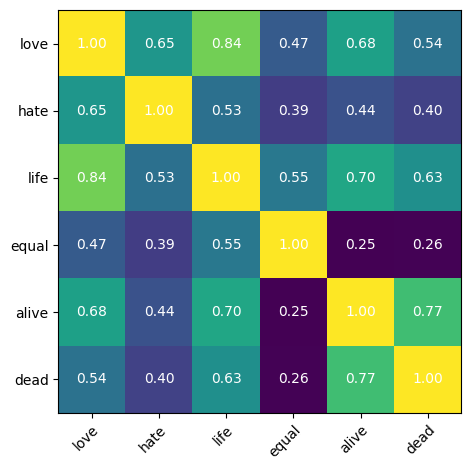

In [139]:
list_of_words = ['love', 'hate', 'life', 'equal', 'alive', 'dead']

similarity_matrix = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)

### YOUR CODE HERE

wordsV = [glove50_model.embed_token(word) for word in list_of_words]

for i in range(len(list_of_words)):
    for j in range(len(list_of_words)):

        if wordsV[i] is not None and wordsV[j] is not None:
            similarity_matrix[i, j] = cosine_similarity(wordsV[i], wordsV[j])




### YOUR CODE ENDS HERE


plot_similarity_matrix(similarity_matrix, list_of_words)

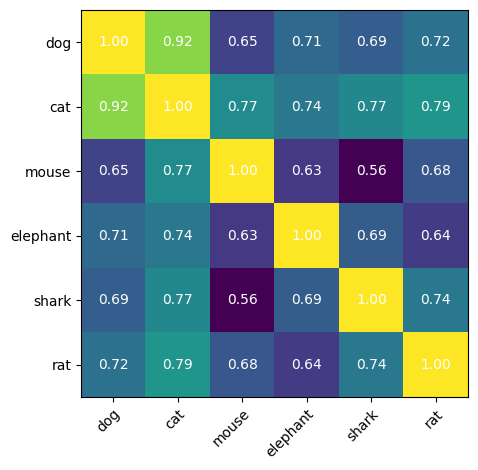

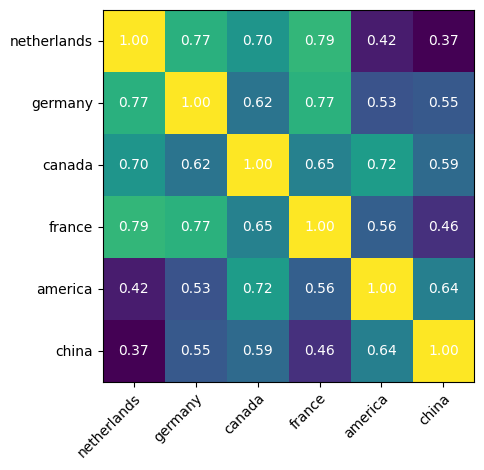

In [140]:
#### YOUR CODE HERE

list_of_words1 = ['dog', 'cat', 'mouse', 'elephant', 'shark', 'rat']# animals
list_of_words2 = ['netherlands', 'germany', 'canada', 'france', 'america', 'china']# words about time

similarity_matrix1 = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)
similarity_matrix2 = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)

### YOUR CODE HERE

words1 = [glove50_model.embed_token(word) for word in list_of_words1]
words2 = [glove50_model.embed_token(word) for word in list_of_words2]

for i in range(len(list_of_words)):
    for j in range(len(list_of_words)):

        if words1[i] is not None and words1[j] is not None:
            similarity_matrix1[i, j] = cosine_similarity(words1[i], words1[j])

        if words2[i] is not None and words2[j] is not None:
            similarity_matrix2[i, j] = cosine_similarity(words2[i], words2[j])




### YOUR CODE ENDS HERE


plot_similarity_matrix(similarity_matrix1, list_of_words1)
plot_similarity_matrix(similarity_matrix2, list_of_words2)

### YOUR CODE ENDS HERE

These results do make sense, however there are some surprise results

Animals -- The two words wiht the highest similarity are cat and dog, which make sense as both are house pets, suprisingly cat has a very high similarity with all words, not dropping below 70, however 'shark' has a suprisingly high similarity with most of the words despite being a fish and not a pet, 'rat' is also suprising as we expected the most similar word to be mouse, but it has the 2nd lowest similarity

Countries -- The results are as expected with countries being closer to each other having higher similarity than other words. This is seen in all eurpean countries having high similarity with each other, and the Netherlands and germany having the lowest similarity with each other. while the american countries have the highest similarity with each other. China has very low similarity with all countries, except america which is expected as they are often mentioned together.



### Back to Sentence Embeddings

Let us go back to embedding the whole sentences by averaging the embeddings in the sentence. Below you can find a code snippet that uses our `embed_text()` function and glove model.

In [141]:
query = 'fox and deer'
print(query)

query_embedding = embed_text(query, clean, tokenize, lambda x: glove50_model.embed_sentence(x, reduction='mean'))
print(query_embedding.shape)
print(query_embedding)

fox and deer
(50,)
[ 0.22032095  0.0235195   0.021275    0.30339     0.24796     0.262455
 -1.47255    -1.331385    0.390455   -0.53557    -0.245335    0.2052835
  0.459515    0.01924     0.261285    0.74634     0.7019      0.0687205
 -1.23738     0.464715   -0.566363   -0.30705     0.91077     0.4335
 -0.05902    -0.965785   -0.3145195   0.52024     0.288965   -0.85955
  1.238405    0.42643    -0.350285   -0.15881    -0.00256    -0.156965
 -0.3466795  -0.58526    -0.433885   -0.018855   -0.689623    0.736835
 -0.755175    0.17236     0.21935    -0.636005   -0.067895   -0.6279
  0.41433     0.50786   ]


<a name='e14'></a>
#### Exercise 14: Analyze sentence embeddings
- Calculate similarity between the word embeddings representations of the selected queries and the dataset sentences.
- Analyze the search results. Does the search work as expected? Discuss the results.
- Compare the results with the ones you got with the bag-of-words and TF-IDF representation. Discuss the differences and similarities.

In [154]:
### YOUR CODE HERE
queries = [
    "Who was the 40th president of the United States?", # Expected success (unique number)
    "What is the tallest mountain in the world?",      # Expected success (rare word 'tallest')
    "Who is the writer of the book series 'Harry Potter'?", # Expected success
    "What is the world population?",                    # Unexpected/Failure (common words)
    "Who was the first president of Spain?",            # Unexpected/Failure (regional bias)
    "What is the capital of Russia?"                    # Unexpected/Failure (needs synonyms)
]
train_embed = []
train_data = answers_dataset['train']
for example in train_data:
    tokens = example['answer_tokens']
    embedding = glove50_model.embed_sentence(tokens, reduction='mean')
    train_embed.append(embedding)

train_embed = np.array(train_embed)

for query in queries:

    cleaned = clean(query)
    q_tokens = tokenize(cleaned)


    query_vec = glove50_model.embed_sentence(q_tokens, reduction='mean')
    similarity = cosine_similarity_1_to_n(query_vec, train_embed)

    top_indices = top_k_indices(similarity, k=5)
    for i, idx in enumerate(top_indices):
        score = similarity[idx]
        answer = ' '.join(train_data[int(idx)]['answer_tokens'])
        print(f"Rank {i+1} (Score: {score:.4f}):")
        print(f"{answer}\n")




### YOUR CODE ENDS HERE

Rank 1 (Score: 0.9616):
united states presidential election of 1900 united states government britannica com united states presidential election of 1900 united states government united states presidential election of 1900 american presidential election held on november 6 1900 in which republican incumbent pres william mckinley defeated democrat william jennings bryan winning 292 electoral votes to bryans 155 results of american presidential election 1900 encyclopædia britannica inc question of imperialism in march 1898 two years into william mckinleys first term as president he gave spainwhich was in midst of brutal campaign of repression in cuba ultimatum spain agreed to most of mckinleys demands including cessation of hostilities against cubans balked at giving up its last major new world colony on april 25 congress passed formal declaration of war in interest of securing cuban independence in brief spanish american war splendid little war in words of secretary of state john hay unite

the sentence embedding is seems to be the most accurate and returns the correct answer for many queries the other methods failed in such as everest being the tallest mountain, although it too fails to find certain results, such as the 40th president, thought it mentions other presidents
Unlike the previous methods it does not return a result about the American presidents when asked about the king of spain. Showing that is has less reliance on individual words such as president

## 6. Evaluating Retrieval

In this last section we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

Recall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e15'></a>
### Exercise 15: Cosine similarity between two sets of vectors

In this exercise you will revisit your implementation of the cosine similarity. Generalize it so that it can accept two arrays containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be an array of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [150]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE

    normV = np.linalg.norm(vectors, axis=1, keepdims=True)
    normO = np.linalg.norm(other_vectors, axis=1, keepdims=True)

    Vunit = vectors / (normV+1e-9)
    otherVunit = other_vectors / (normO+1e-9)

    return np.dot(Vunit, otherVunit.T)



    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [151]:
def calculate_recall(queries, sentences, labels, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)
                label = labels[query_index]
                if label in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

Here, we embed both the queries and answers from the validation subset.

In [152]:
query_embeddings = []
expected_answers = []
for example in tqdm.tqdm(dataset['validation']):
    query_tokens = example['query_tokens']
    query_embeddings.append(glove50_model.embed_sentence(query_tokens, reduction='mean'))
    expected_answers.append(example['answer_id'])
query_embeddings = np.stack(query_embeddings, axis=0)
expected_answers = np.array(expected_answers)

answers_embeddings = []
for example in tqdm.tqdm(answers_dataset['validation']):
    answer_tokens = example['answer_tokens']
    answers_embeddings.append(glove50_model.embed_sentence(answer_tokens, reduction='mean'))
answers_embeddings = np.stack(answers_embeddings, axis=0)

100%|██████████| 9765/9765 [00:16<00:00, 606.92it/s]


You can use the recall function like so:

In [153]:
recall_at_1 = calculate_recall(query_embeddings, answers_embeddings, expected_answers, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

100%|██████████| 10000/10000 [00:01<00:00, 8530.49it/s]


11.62%


<a name='e16'></a>
### Exercise 16: Evaluating retrieval methods

Calculate recall for different values of $K$ for all methods:
- BOW,
- TF-IDF,
- Pre-trained embeddings.
- Another pre-trained embeddings (for example with larger embedding vectors)

Make sure to test on the `test` split. Discuss the results. Comment on how recall changes based on the value of $K$. Are the results expected or surprising?

The deliverable for this whole lab is a scientific poster and this last question should be the main thing you will include in the poster.

In [155]:
#### YOUR CODE HERE

K = [1, 5, 10, 20]
tQuery = dataset['test']
tAnswers = answers_dataset['test']
labels = np.array([ex['answer_id'] for ex in tQuery])

methods = [
    {
        "name": "BOW",
        "q_embed": lambda x: bag_of_words(tokenize(clean(x)), token_to_id),
        "a_embed": lambda x: bag_of_words(x, token_to_id)
    },
    {
        "name": "TF-IDF",
        "q_embed": lambda x: embed_tf_idf(tokenize(clean(x)), token_to_id, idf),
        "a_embed": lambda x: embed_tf_idf(x, token_to_id, idf)
    },
    {
        "name": "GloVe 50",
        "q_embed": lambda x: glove50_model.embed_sentence(tokenize(clean(x)), reduction='mean'),
        "a_embed": lambda x: glove50_model.embed_sentence(x, reduction='mean')
    }
]

result = {}

for method in methods:
    q_list = []
    for ex in tqdm.tqdm(tQuery, desc="Embedding Queries"):
        q_list.append(method['q_embed'](ex['query']))
    q_matrix = np.stack(q_list)

    # Create Answer Embeddings
    a_list = []
    for ex in tqdm.tqdm(tAnswers, desc="Embedding Answers"):
        a_list.append(method['a_embed'](ex['answer_tokens']))
    a_matrix = np.stack(a_list)

    # Calculate Recall for each K
    method_recalls = {}
    for k in K:
        r_k = calculate_recall(q_matrix, a_matrix, labels, k=k)
        method_recalls[k] = r_k
        print(f"Result: {method['name']} Recall@{k} = {r_k * 100:.2f}%")

    result[method['name']] = method_recalls




### YOUR CODE ENDS HERE

100%|██████████| 10000/10000 [01:05<00:00, 151.73it/s]


Result: BOW Recall@1 = 17.35%


100%|██████████| 10000/10000 [00:58<00:00, 172.17it/s]


Result: BOW Recall@5 = 29.97%


100%|██████████| 10000/10000 [00:59<00:00, 168.52it/s]


Result: BOW Recall@10 = 36.19%


100%|██████████| 10000/10000 [00:58<00:00, 171.74it/s]


Result: BOW Recall@20 = 42.96%


100%|██████████| 10000/10000 [00:48<00:00, 206.02it/s]


Result: TF-IDF Recall@1 = 36.97%


100%|██████████| 10000/10000 [00:46<00:00, 214.73it/s]


Result: TF-IDF Recall@5 = 63.16%


100%|██████████| 10000/10000 [00:47<00:00, 212.31it/s]


Result: TF-IDF Recall@10 = 72.09%


100%|██████████| 10000/10000 [00:44<00:00, 223.59it/s]


Result: TF-IDF Recall@20 = 78.74%


100%|██████████| 10000/10000 [00:00<00:00, 10177.36it/s]


Result: GloVe 50 Recall@1 = 11.93%


100%|██████████| 10000/10000 [00:00<00:00, 11050.87it/s]


Result: GloVe 50 Recall@5 = 24.27%


100%|██████████| 10000/10000 [00:00<00:00, 12219.91it/s]


Result: GloVe 50 Recall@10 = 30.73%


100%|██████████| 10000/10000 [00:00<00:00, 12389.84it/s]

Result: GloVe 50 Recall@20 = 38.33%


As K increases all methods recall rates get larger, at K = 1 the sentence embedding is the worst with the tf-idf being the best. Throughout the rest of the K values the sentence embedding is the worst performing method.
As expected the tf-idf has the highest recall rate at K =20, however the recall rate is extremely high, double that of the next best method. I believe that this is due to the meaning out of the query which places a lot less emphasis on individual or rare words. this makes the embedding better at general answers, but misses out on the actual specific answers,such as if the query is 'whats the mitochondria' it mentions biology and cells but not mitochondria